# Implementing Linear Regression Model using Housing Data.

## Steps Involved in implementing Linear Regression Model.
1.Import Libraries and Dataset \
2.Checking for Assumptions  like Multicollinearity and removing it \
3.Feature scaling \
4.Perform Train Test Split \
5.Implement Linear regression Model using scikit learn \
6.Generate Predictions over the model \
7.Evaluate the model using various metrics \
8.Plotting the Residuals and Check for Homoscedasticity \
9.Verifying the Assumptions of Linear Regression \
10.Visualizing coefficients to interpret the resuls  

## Import Libraries and Dataset 


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action='ignore')

In [146]:
mercury = pd.read_csv('Transformed_Housing_Data2.csv')
mercury.head() 

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


## Scaling the Data

In [147]:
sc  =StandardScaler()
Y = mercury['Sale_Price']
X = mercury.drop(['Sale_Price'],axis=1)
venus = sc.fit_transform(X)
venus1 = pd.DataFrame(data = venus,columns=mercury.drop(columns = ['Sale_Price']).columns)
venus1.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


## Checking for MultiCollinearity and Removing the Variables. 

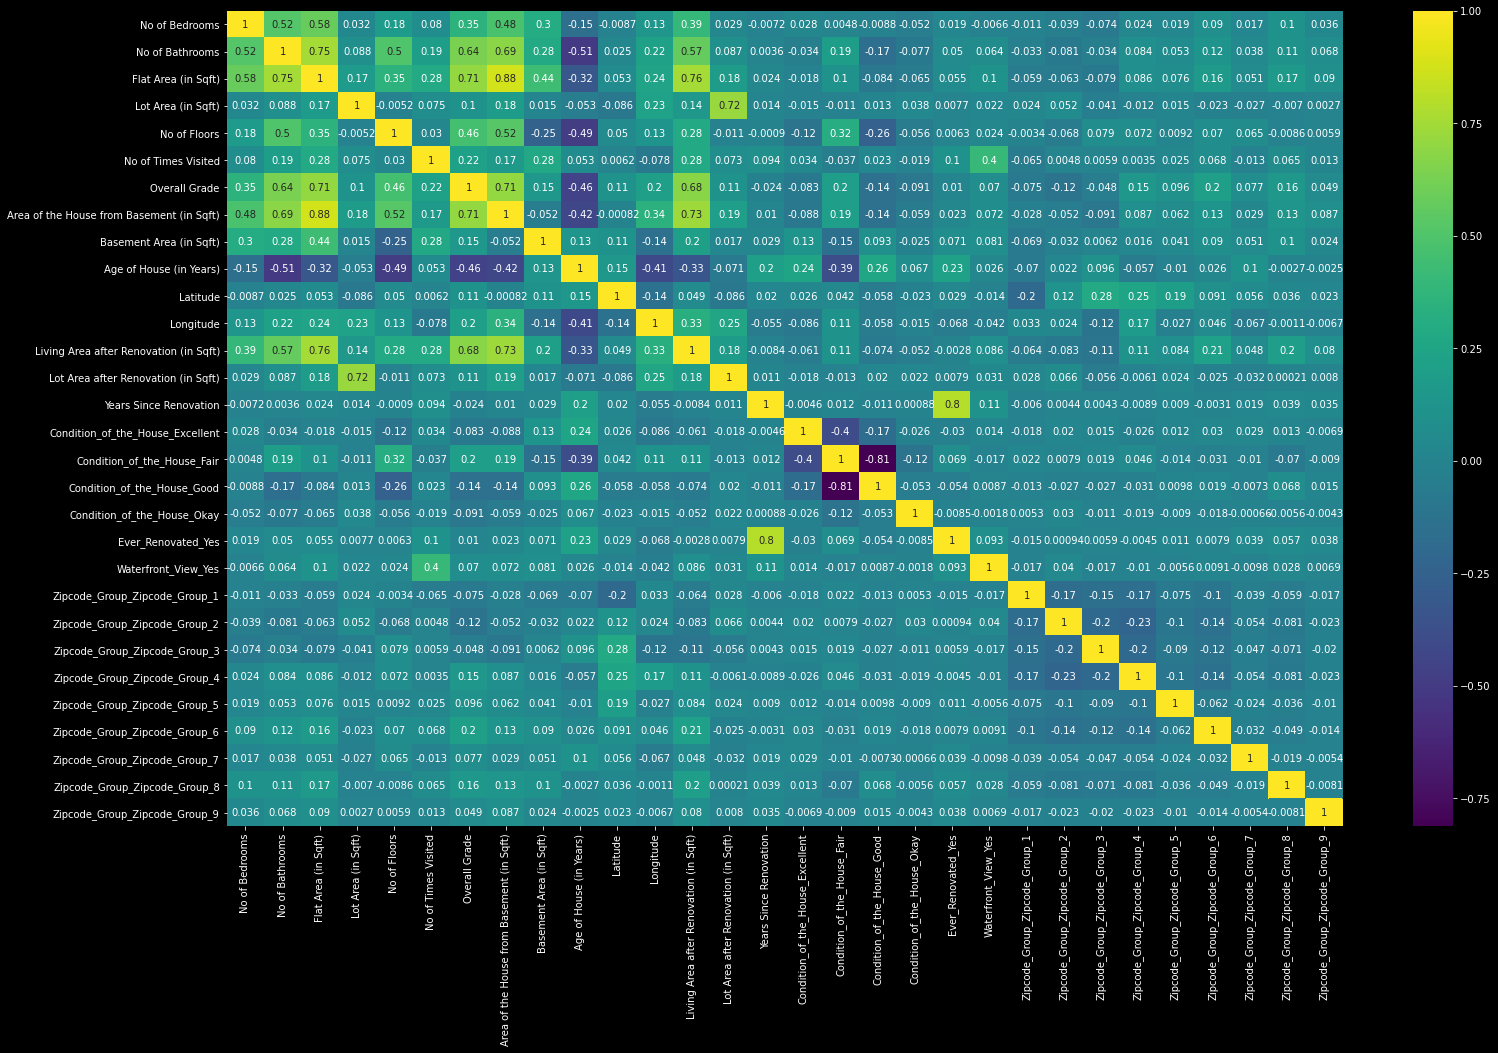

In [148]:
plt.figure(figsize = (25,15))
corr = venus1.corr()
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

In [149]:
# Method 1

def correlation(dataset,threshold):
    corr_list = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                column = corr_matrix.columns[i]
                corr_list.append(column)
    print(len(corr_list))
    return corr_list
correlation(venus1,0.5)

16


['No of Bathrooms',
 'Flat Area (in Sqft)',
 'Flat Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Living Area after Renovation (in Sqft)',
 'Living Area after Renovation (in Sqft)',
 'Living Area after Renovation (in Sqft)',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)',
 'Ever_Renovated_Yes']

In [150]:
# Method 2

k = venus1.corr()
z =[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [151]:
vif = variance_inflation_factor
earth = pd.Series([vif(venus1.values, i) for i in range(venus1.shape[1])], index = venus1.columns)
earth

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [152]:
earth[earth == earth.max()].index[0]

'Flat Area (in Sqft)'

In [153]:
def mc_remover(data):
    earth = pd.Series([vif(data.values, i) for i in range(data.shape[1])], index = data.columns)
    if earth.max() > 5:
        print(earth[earth == earth.max()].index[0], "has been Removed")
        data = data.drop(columns = [earth[earth == earth.max()].index[0]])
        return data
    else:
        print("Multicollinearity has been Eliminated.")
        return data

In [154]:
for i in range(7):
    venus1 = mc_remover(venus1)
venus1.head()

Flat Area (in Sqft) has been Removed
Condition_of_the_House_Fair has been Removed
Multicollinearity has been Eliminated.
Multicollinearity has been Eliminated.
Multicollinearity has been Eliminated.
Multicollinearity has been Eliminated.
Multicollinearity has been Eliminated.


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [155]:
earth_1 = pd.Series([vif(venus1.values, i) for i in range(venus1.shape[1])], index = venus1.columns)
earth_1

No of Bedrooms                               1.638990
No of Bathrooms                              3.373805
Lot Area (in Sqft)                           2.107495
No of Floors                                 2.127703
No of Times Visited                          1.432363
Overall Grade                                2.956967
Area of the House from Basement (in Sqft)    4.580042
Basement Area (in Sqft)                      1.974981
Age of House (in Years)                      2.626504
Latitude                                     2.471343
Longitude                                    1.672667
Living Area after Renovation (in Sqft)       3.063886
Lot Area after Renovation (in Sqft)          2.144068
Years Since Renovation                       2.788064
Condition_of_the_House_Excellent             1.206487
Condition_of_the_House_Good                  1.251488
Condition_of_the_House_Okay                  1.025386
Ever_Renovated_Yes                           2.955539
Waterfront_View_Yes         

In [157]:
venus1.head()

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


## Perform Train Test Split

In [169]:
x_train,x_test,y_train,y_test = train_test_split(venus1,Y,test_size=0.3,random_state=101)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15126, 28), (15126,), (6483, 28), (6483,))

## Training the Model 

In [170]:
l_r = LinearRegression(normalize=True)
lr_model = l_r.fit(x_train,y_train)

In [171]:
# Coefficients With respect to independent variables, where m0 = 0,
# because we have normalised the data, so the values start from m1, m2...
lr_model.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [172]:
print("The Training Accuracy Score of Linear Regression Model is:", lr_model.score(x_train,y_train))
print("The Test Accuracy Score of Linear Regression Model is:", lr_model.score(x_test,y_test))

The Training Accuracy Score of Linear Regression Model is: 0.8412406591458191
The Test Accuracy Score of Linear Regression Model is: 0.8461987715586199


## Evaluating Model 

In [173]:
predict = l_r.predict(x_test)
predict

array([ 550000.54013871,  645339.25748139,  612230.85487286, ...,
       1026223.16735843,  944048.41005879, 1204608.7500112 ])

In [177]:
print(lr_model.score(x_test,y_test))

0.8461987715586199


## Plotting the Residuals 

In [194]:
residuals = predict - y_test
residual_table = pd.DataFrame({'Predictions' : predict, 'Residuals':residuals})
residual_table = residual_table.sort_values(by='Predictions')

In [195]:
residual_table

,Predictions,Residuals
1147,-1.518999e+05,-226899.922361
19450,-6.879527e+04,-210795.272576
4201,9.942282e+03,-140057.717848
11586,3.104344e+04,-156956.559744
13714,3.449980e+04,-145500.198922
...,...,...
6506,1.499538e+06,369963.447042
9252,1.528050e+06,398475.423771
15253,1.570681e+06,441105.516766
18475,1.574000e+06,444424.624355


In [196]:
z = [i for i in range(int(residual_table['Predictions'].max()))]
k = [0 for i in range(int(residual_table['Predictions'].max()))]

In [201]:
residual_table['Predictions'].max()

1717743.280448359

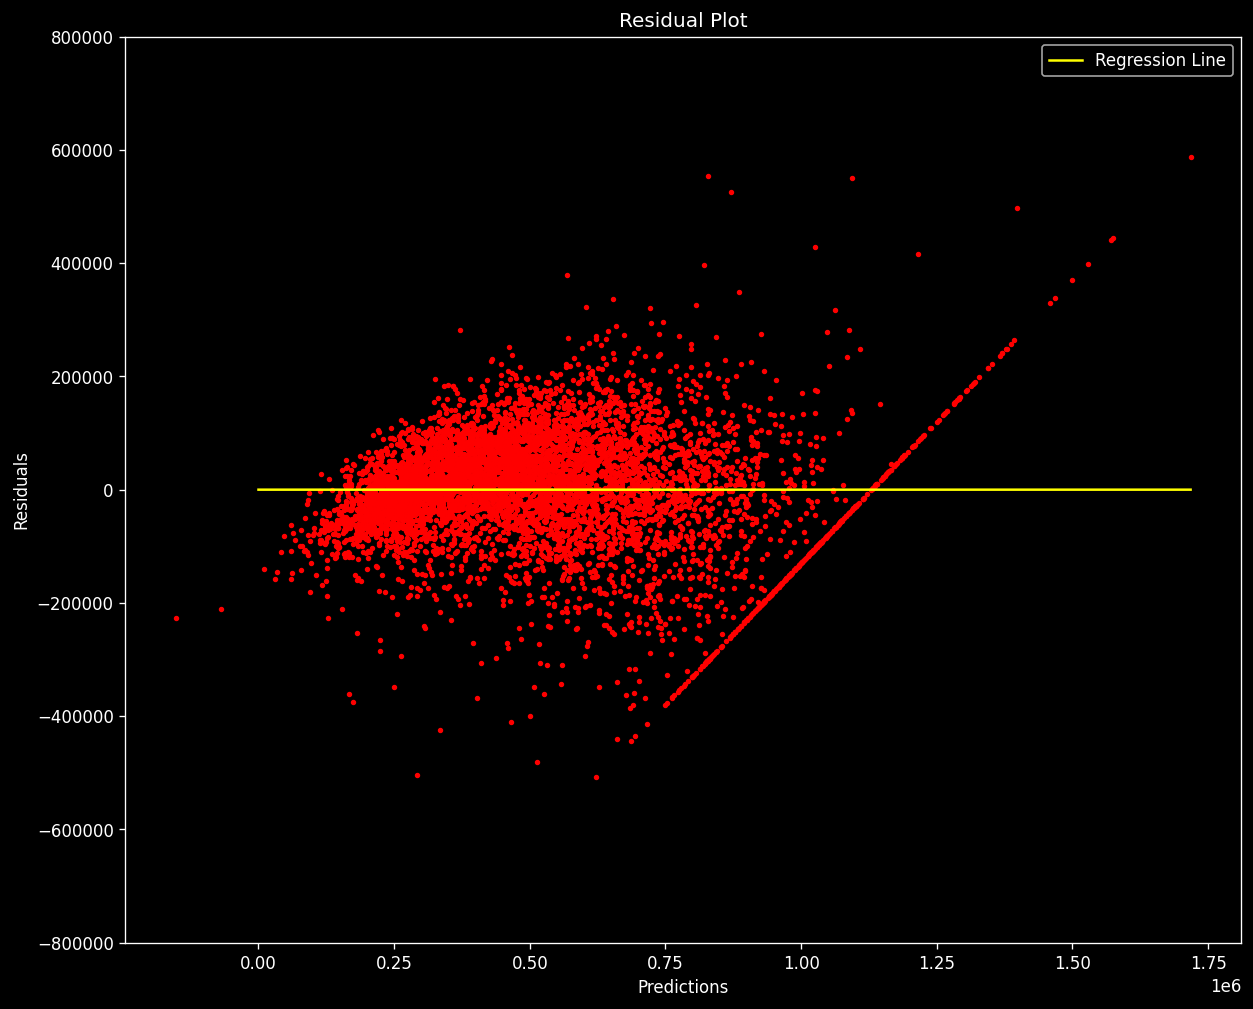

In [212]:
plt.figure(figsize = (12,10),dpi =120)
plt.scatter(residual_table['Predictions'], residual_table['Residuals'], color='red', s=5)
plt.plot(z,k,color='yellow',label ='Regression Line')
plt.ylim(-800000,800000)
plt.ylabel('Residuals')
plt.xlabel('Predictions')
plt.title('Residual Plot')
plt.legend()
plt.show()

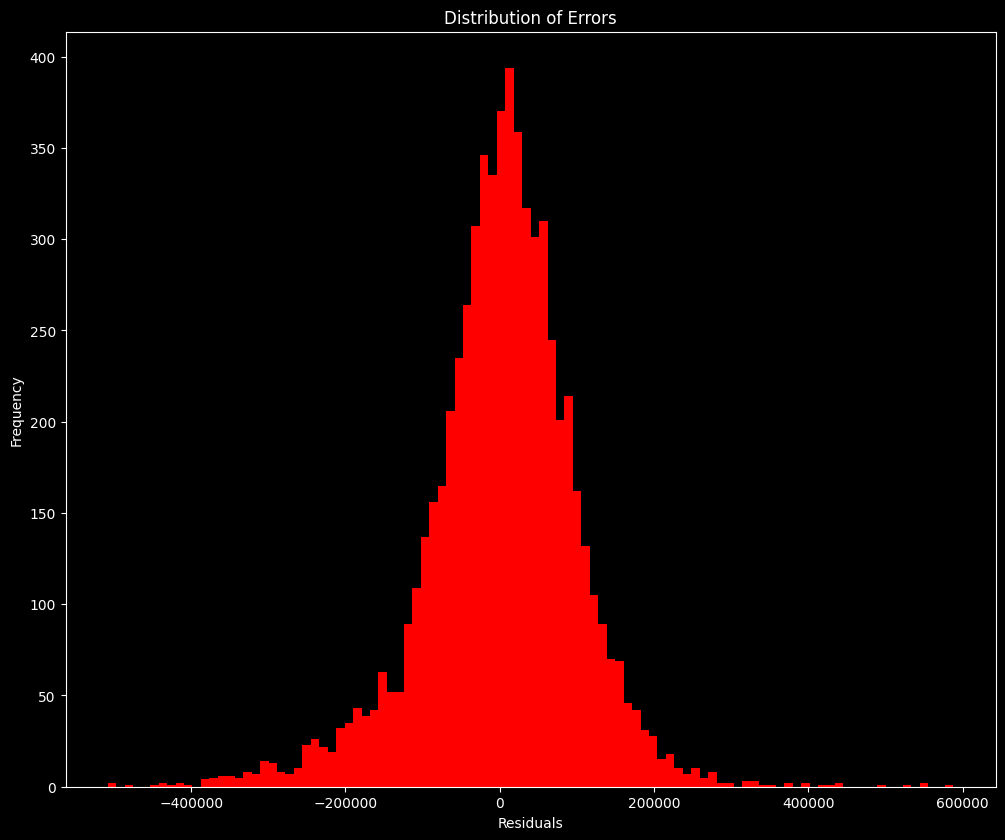

In [220]:
plt.figure(figsize=(12,10), dpi =100)
plt.hist(residual_table['Residuals'],color='red', bins=100)
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Distribution of Errors")
plt.show()

Hence, This Residuals follows Normal Distribution, also we have some Outliers on the far right of the graph.

## Verifying Coefficients 

In [232]:
coefficient_table = pd.DataFrame({'columns':x_test.columns,
                                  'coefficients':l_r.coef_})
coefficient_table = coefficient_table.sort_values(by = 'coefficients')
coefficient_table

,columns,coefficients
10,Longitude,-23854.326402
13,Years Since Renovation,-10179.085198
0,No of Bedrooms,-3928.662476
12,Lot Area after Renovation (in Sqft),-2896.985429
16,Condition_of_the_House_Okay,-2296.648881
3,No of Floors,2697.552786
15,Condition_of_the_House_Good,5095.976036
18,Waterfront_View_Yes,10761.770079
1,No of Bathrooms,12028.445607
19,Zipcode_Group_Zipcode_Group_1,12165.833721


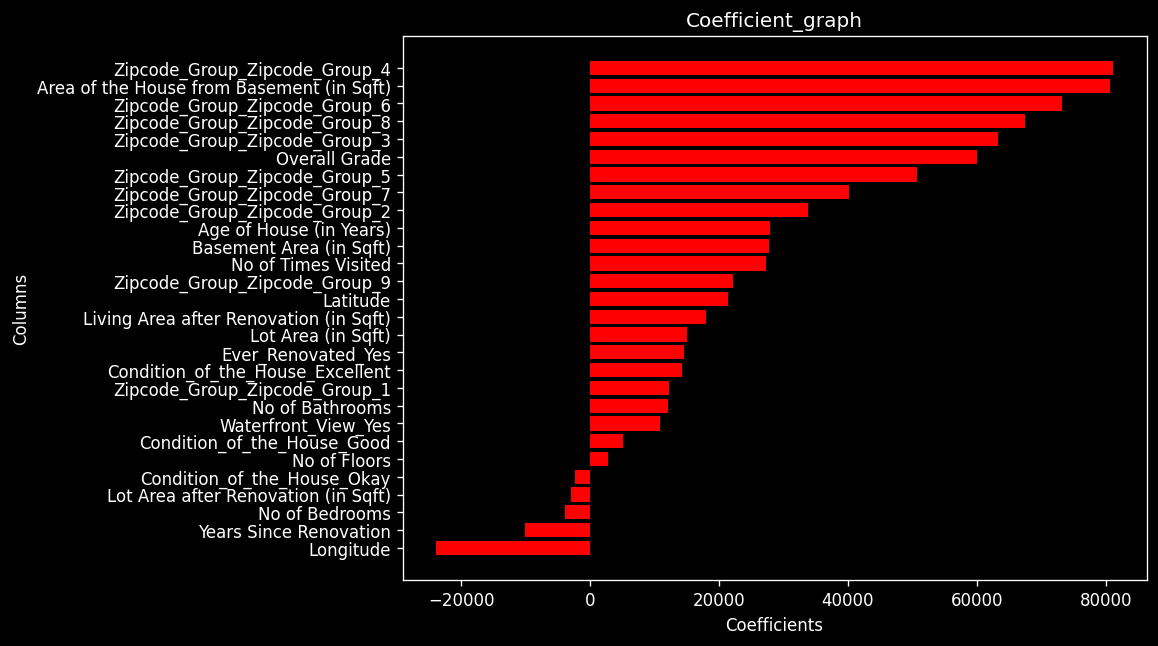

In [250]:
plt.figure(figsize=(8,6), dpi =120)
x = coefficient_table['columns']
y = coefficient_table['coefficients']
plt.barh(x,y,color='red')
plt.ylabel("Columns")
plt.xlabel("Coefficients")
plt.title("Coefficient_graph")
plt.show()